## Visualizing the Data

In [1]:
import os

In [5]:
data_dir='C:\\Users\\fakthar\\Downloads\\cell_images'

In [6]:
os.listdir(data_dir)

['test', 'train']

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
%matplotlib inline

In [8]:
my_data_dir='C:\\Users\\fakthar\\Downloads\\cell_images'

In [9]:
os.listdir(my_data_dir)

['test', 'train']

In [10]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

In [11]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [12]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [13]:
os.listdir(train_path+'\\parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [14]:
para_cell = train_path+'\\parasitized'+'\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [15]:
para_img=imread(para_cell)

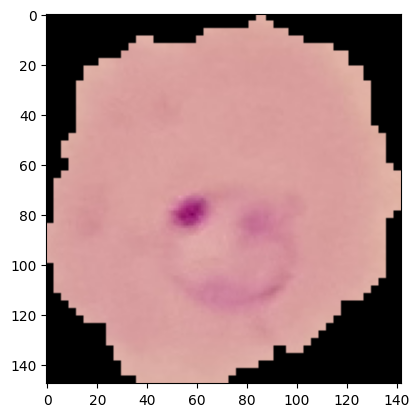

In [16]:
plt.imshow(para_img)

In [17]:
para_img.shape

(148, 142, 3)

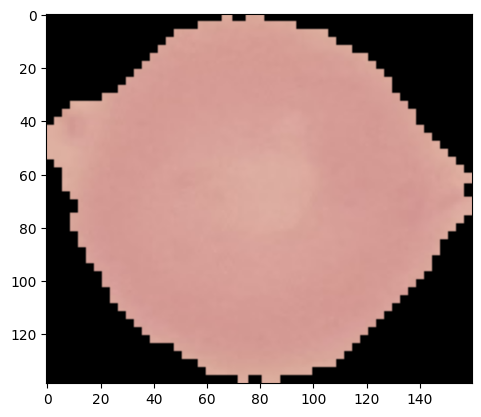

In [18]:
unifected_cell_path = train_path+'\\uninfected\\'+os.listdir(train_path+'\\uninfected')[0]
unifected_cell = imread(unifected_cell_path)
plt.imshow(unifected_cell)

In [19]:
unifected_cell.shape

(139, 160, 3)

In [20]:
len(os.listdir(train_path+'\\parasitized'))

12480

In [28]:
len(os.listdir(test_path+'\\parasitized'))

1300

In [26]:
dim1 = []
dim2 = []
count=0
for image_filename in os.listdir(test_path+'\\uninfected'):
    
    img = imread(test_path+'\\uninfected'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)
    count+=1

In [25]:
len(dim1)

1300

In [27]:
count

1300

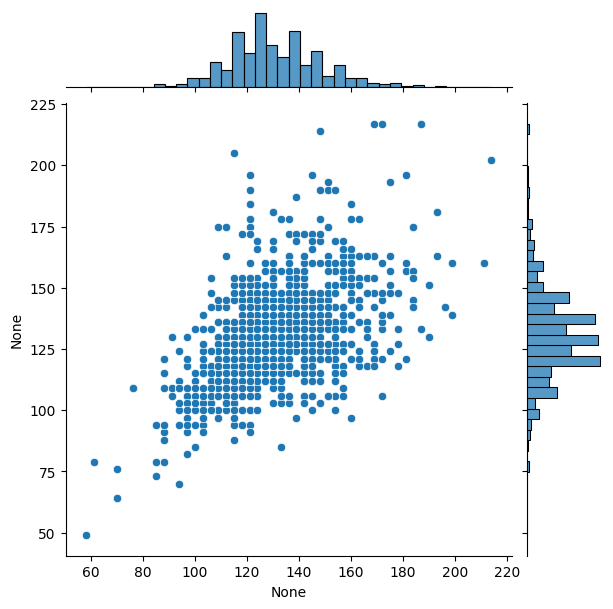

In [29]:
sns.jointplot(x=dim1, y=dim2)

In [30]:
np.mean(dim1)

130.92538461538462

In [31]:
np.mean(dim2)

130.75

In [32]:
image_shape=(130,130,3)

## Preparing the Data for the model

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [34]:
image_gen=ImageDataGenerator(
    rotation_range=20,
    height_shift_range=0.10,
    rescale=1/255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

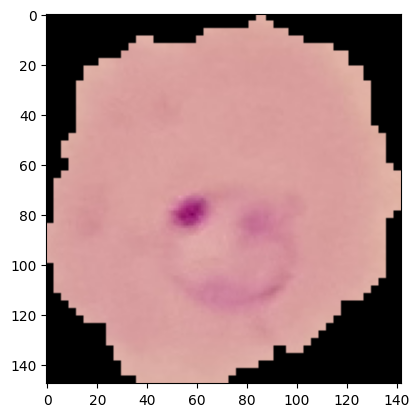

In [37]:
plt.imshow(para_img)

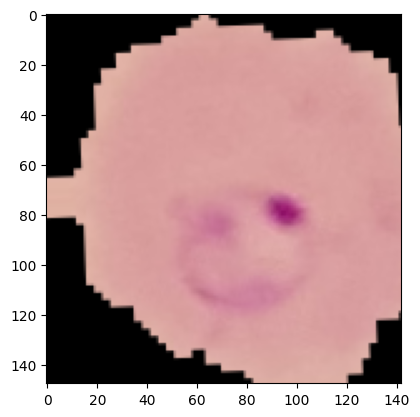

In [38]:
plt.imshow(image_gen.random_transform(para_img))

In [39]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


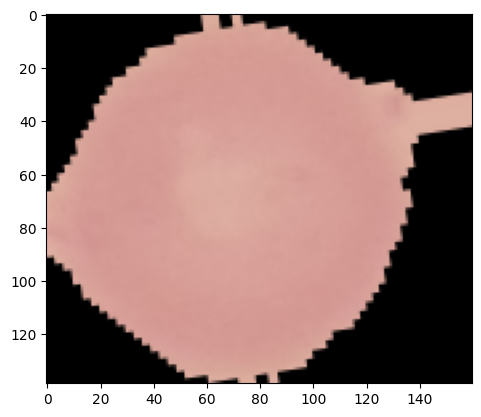

In [42]:
unifected_cell_path = train_path+'\\uninfected\\'+os.listdir(train_path+'\\uninfected')[0]
unifected_cell = imread(unifected_cell_path)
plt.imshow(image_gen.random_transform(unifected_cell))

In [41]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


## Creating the Model

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dropout,Dense,Conv2D,MaxPooling2D,Flatten

In [46]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))


model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


C:\Users\fakthar\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,662,209 (6.34 MB)

 Trainable params: 1,662,209 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

## Early Stopping

In [48]:
from tensorflow.keras.callbacks import EarlyStopping

In [49]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

## Training the Model

In [50]:
batch_size=16

In [51]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 24958 images belonging to 2 classes.


In [52]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [53]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [54]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
results = model.fit(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
 766/1560 ━━━━━━━━━━━━━━━━━━━━ 1:45 133ms/step - accuracy: 0.5679 - loss: 0.6698

KeyboardInterrupt: 

# Since the fitting of the model takes long time ,we are loading it from already fitted by the course author.

In [57]:
from tensorflow.keras.models import load_model
model.save('malaria_detector.h5')

In [58]:
model.evaluate(test_image_gen)

163/163 ━━━━━━━━━━━━━━━━━━━━ 16s 99ms/step - accuracy: 0.7886 - loss: 0.3717


[0.36923685669898987, 0.8573076725006104]

In [59]:
model.metrics_names

['loss', 'compile_metrics']

In [60]:
from tensorflow.keras.preprocessing import image

In [61]:
pred_probabilities=model.predict(test_image_gen)

163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step


In [62]:
pred_probabilities

array([[2.0697289e-04],
       [2.3249327e-03],
       [2.8169777e-03],
       ...,
       [8.5008460e-01],
       [7.0962894e-01],
       [6.5399086e-01]], dtype=float32)

In [67]:
predictions = pred_probabilities > 0.5

In [68]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [69]:
from sklearn.metrics import classification_report,confusion_matrix

In [71]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [72]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      1300
           1       0.81      0.95      0.87      1300

    accuracy                           0.86      2600
   macro avg       0.87      0.86      0.86      2600
weighted avg       0.87      0.86      0.86      2600



In [73]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1005,  295],
       [  62, 1238]], dtype=int64)

## Predicting on an image

In [74]:
para_cell

'C:\\Users\\fakthar\\Downloads\\cell_images\\train\\\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [75]:
my_image=image.load_img(para_cell,target_size=image_shape)

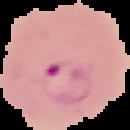

In [76]:
my_image

In [77]:
my_image = image.img_to_array(my_image)

In [78]:
type(my_image)

numpy.ndarray

In [79]:
my_image.shape

(130, 130, 3)

In [80]:
my_image = np.expand_dims(my_image, axis=0)

In [81]:
my_image.shape

(1, 130, 130, 3)

In [84]:
model.predict(my_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


array([[0.]], dtype=float32)

In [85]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

## COMPLETED